<a href="https://colab.research.google.com/github/lmcginley620/AI/blob/main/HW7/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving nasa_asteroid.csv to nasa_asteroid (4).csv


In [ ]:
import pandas as pd

In [ ]:
import io
df = pd.read_csv('nasa_asteroid.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

Training Accuracy: 1.0
Validation Accuracy: 0.9725609756097561
Test Accuracy: 0.9793887704335466
Training Accuracy: 1.0
Validation Accuracy: 0.9664634146341463
Test Accuracy: 0.9836531627576404
Layer 0 - Weight matrix shape: (33, 150)
Layer 1 - Weight matrix shape: (150, 50)
Layer 2 - Weight matrix shape: (50, 1)

Layer 0 - Intercept vector shape: (150,)
Layer 1 - Intercept vector shape: (50,)
Layer 2 - Intercept vector shape: (1,)
Overall Training Accuracy: 1.0


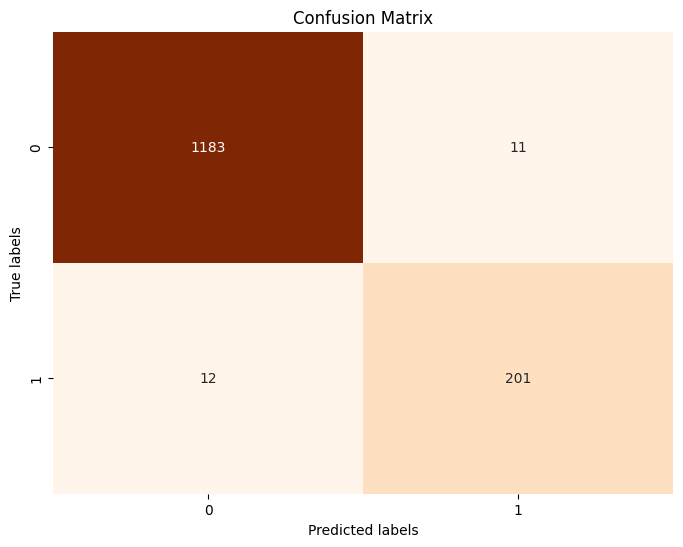

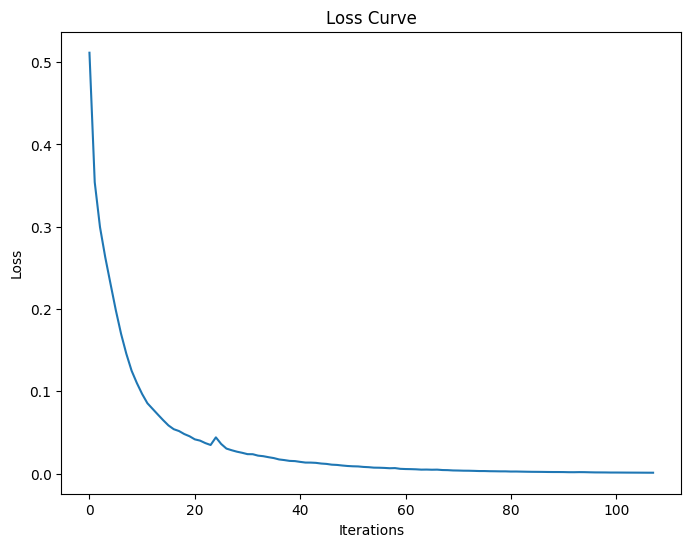

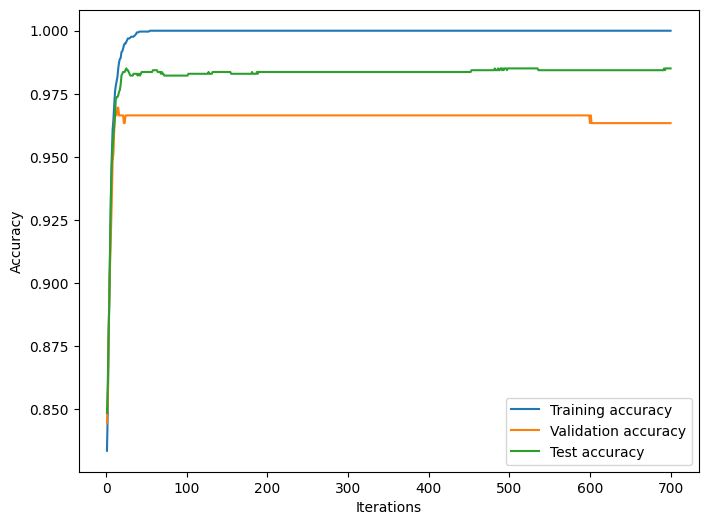

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Separate features and target variable
X = df.drop(['Name','Orbiting Body', 'Hazardous','Close Approach Date', 'Epoch Date Close Approach',
           'Orbit Determination Date', 'Close Approach Date',  'Orbit Determination Date', 'Equinox'], axis=1)
y = df['Hazardous']

# Split the dataset into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)


# Create and train the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,50), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Calculate accuracies
train_accuracy = mlp.score(X_train_scaled, y_train)
val_accuracy = mlp.score(X_val_scaled, y_val)
test_accuracy = mlp.score(X_test_scaled, y_test)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

print(" ")

# Testing different Hyper Parameters - MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(150,50), max_iter=700, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Calculate accuracies
train_accuracy = mlp.score(X_train_scaled, y_train)
val_accuracy = mlp.score(X_val_scaled, y_val)
test_accuracy = mlp.score(X_test_scaled, y_test)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

# Information about the weights and biases of the trained model
for i, coef in enumerate(mlp.coefs_):
    print(f"Layer {i} - Weight matrix shape: {coef.shape}")

print()

for i, intercept in enumerate(mlp.intercepts_):
    print(f"Layer {i} - Intercept vector shape: {intercept.shape}")

# Calculate the overall training accuracy
train_accuracy_overall = mlp.score(X_train_scaled, y_train)
print(f"Overall Training Accuracy: {train_accuracy_overall}")

# Display the confusion matrix for the test set
y_pred = mlp.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Display the loss curve
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

mlp = MLPClassifier(hidden_layer_sizes=(150,50), max_iter=700, random_state=42)

# Plot the training, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

for i in range(700):
    mlp.partial_fit(X_train_scaled, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train_scaled, y_train))
    val_accuracies.append(mlp.score(X_val_scaled, y_val))
    test_accuracies.append(mlp.score(X_test_scaled, y_test))

plt.figure(figsize=(8, 6))
plt.plot(range(1, 701), train_accuracies, label='Training accuracy')
plt.plot(range(1, 701), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 701), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In the program, I dropped features like 'Name','Orbiting Body', 'Hazardous','Close Approach Date', 'Epoch Date Close Approach', 'Orbit Determination Date', 'Close Approach Date',  'Orbit Determination Date', 'Equinox’ in order to eliminate any unnecessary data that. They were not useful predictors to tell whether or not they were Hazardous or Non-Hazardous.


The model was trained with 2 hidden layers and I first tried the parameters (30,50) 500 iterations and then changed the hyperparameters to 150 and 50 neurons over 700 iterations. At the time of running the program, it resulted in a test accuracy of 0.9836531627576404, and validation accuracy of 0.9664634146341463. According to the results of the confusion matrix, 1183 out of the 1195 asteroids are predicted as non-hazardous. 201 out of 212 were predicted as hazardous.

Overall, this program effectively utilizes a NASA asteroid dataset to construct an MLPClassifier model for classifying asteroids as Hazardous or Non-Hazardous. Through thorough data preprocessing, model training, and evaluation, the program provides insights into the classification accuracy, confusion matrix, and loss curve. By exploring various hyperparameter configurations, it seeks to optimize the model's performance. Overall, this approach offers a systematic methodology for analyzing asteroid data and developing accurate classification models, which can be valuable for assessing potential hazards posed by asteroids in near-Earth space.